**Abstract**

The objective is to identify significant factors influencing traffic crash outcomes and to predict these outcomes accurately. Given the complexity and variability of crash data, the challenge lies in determining which variables most strongly predict the occurrence and severity of crashes. This study focuses on exploring the relationship between various conditions (e.g., weather, lighting, road conditions) and crash outcomes to improve understanding and potentially guide preventive measures.
Utilizing the H2O AutoML framework, we embarked on constructing and evaluating multiple predictive models to analyze a comprehensive dataset of traffic crashes. The dataset includes a wide range of variables, from environmental conditions to traffic patterns. We began by preprocessing the data to address missing values and encode categorical variables. Following this, we engaged AutoML to automate the process of model selection and tuning, focusing on models excluding deep learning algorithms to manage computational demands. To assess model assumptions and the independence of predictor variables, we examined correlation matrices and utilized variance inflation factors. Additionally, we employed regularization techniques to refine model performance and mitigate overfitting.
The AutoML process highlighted Gradient Boosting Machines (GBM) as the most effective model for predicting crash outcomes, emphasizing the significance of variables such as posted speed limits and trafficway types. Variable importance rankings revealed these factors as crucial in influencing crash outcomes. Our findings indicate that while some variables significantly impact the model's predictions, others contribute minimally. The GBM model, with its ability to handle complex nonlinear relationships, outperformed simpler linear models, showcasing superior predictive accuracy. This suggests that traffic crash outcomes, while influenced by a multitude of factors, can be predicted with a reasonable degree of accuracy using advanced machine learning techniques. The study underscores the potential of machine learning in enhancing traffic safety analysis and intervention strategies.

In [ ]:
# Import the processed data from notebook One
url = ""
df = h2o.import_file(path = url)

In [1]:
!pip install h2o
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; OpenJDK 64-Bit Server VM Corretto-17.0.8.8.1 (build 17.0.8.1+8-LTS, mixed mode, sharing)
  Starting server from C:\Users\YAGNIK\anaconda3\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\YAGNIK\AppData\Local\Temp\tmpm5iufdn5
  JVM stdout: C:\Users\YAGNIK\AppData\Local\Temp\tmpm5iufdn5\h2o_YAGNIK_started_from_python.out
  JVM stderr: C:\Users\YAGNIK\AppData\Local\Temp\tmpm5iufdn5\h2o_YAGNIK_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


C:\Users\YAGNIK\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,America/Chicago
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 30 days
H2O_cluster_name:,H2O_from_python_YAGNIK_uwwec3
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.945 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [2]:

data_path = "Traffic_Crashes_-_Crashes.csv"
data = h2o.import_file(data_path)


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [3]:
train, test = data.split_frame(ratios=[.8], seed=1234)

In [4]:
import h2o
from h2o.automl import H2OAutoML

h2o.init()

# Assuming your dataset is already imported into H2O and named 'data'
# data = h2o.import_file("path/to/your/dataset.csv")

# Create a simpler binary target variable for demonstration purposes
# This variable indicates whether the posted speed limit is above 30 mph
data['high_speed_limit'] = (data['POSTED_SPEED_LIMIT'] > 30).asfactor()

# Sample approximately 50% of the data to reduce the size
sampled_data = data.split_frame(ratios=[0.4], seed=1234)[0]

# Proceed to use 'sampled_data' for splitting into training and testing sets
train, test = sampled_data.split_frame(ratios=[.8], seed=1234)

# Set the simpler Y variable as the one you want to predict, which is 'high_speed_limit'
y = 'high_speed_limit'
x = sampled_data.columns
x.remove(y)  # Ensure the target variable is not included in the list of predictors

# Keep the AutoML settings optimized for quicker runtime
aml = H2OAutoML(max_models=10, # Reduced number of models
                seed=1,
                exclude_algos=["DeepLearning", "StackedEnsemble"], # Exclude more algorithms
                max_runtime_secs=600) # Reduced runtime limit
aml.train(x=x, y=y, training_frame=train)


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,29 secs
H2O_cluster_timezone:,America/Chicago
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 30 days
H2O_cluster_name:,H2O_from_python_YAGNIK_uwwec3
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,976 Mb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


AutoML progress: |█
19:54:07.711: AutoML: XGBoost is not available; skipping it.
19:54:07.757: _train param, Dropping bad and constant columns: [CRASH_RECORD_ID, INJURIES_UNKNOWN]

███████
19:54:49.121: _train param, Dropping bad and constant columns: [CRASH_RECORD_ID]

█████████████████
19:57:53.241: _train param, Dropping bad and constant columns: [CRASH_RECORD_ID]

█
19:58:03.411: _train param, Dropping bad and constant columns: [CRASH_RECORD_ID]

██████
19:59:02.935: _train param, Dropping bad and constant columns: [CRASH_RECORD_ID]

███████
20:00:13.589: _train param, Dropping bad and constant columns: [CRASH_RECORD_ID]

██████████
20:01:56.737: _train param, Dropping bad and constant columns: [CRASH_RECORD_ID]

█
20:02:01.256: XRT_1_AutoML_1_20240219_195406 [DRF XRT (Extremely Randomized Trees)] failed: java.lang.AssertionError
20:02:01.272: _train param, Dropping bad and constant columns: [CRASH_RECORD_ID]

█████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_5_AutoML_1_20240219_195406


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    530                530                         580434                 1            6            5.4566        2             64            52.4698

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 2.765154263298257e-37
RMSE: 5.258473412786506e-19
LogLoss: 1.245314770981197e-21
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 1.0
       0       1      Error    Rate
-----  ------  -----  -------  --------------
0      163070  0      0        (0.0/163070.0)
1      0       15234  0        (0.0/15234.0)
Total  163070  15234  0        (0.0/178304.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value    idx
---------------------------  -----------  -------  -----
max f1                       1            1        0
max f2                       1            1        0
max f0point5                 1            1        0
max accuracy                 1            1        0
max precision                1            1        0
max recall                   1            1        0
max specificity              1            1        0
max absolute_mcc             1            1        0
max min_per_class_accuracy   1            1        0
max mean_per_class_accuracy  1            1        0
max tns                      1            163070   0
max fns                      1            0        0
max fps                      1e-19        163070   23
max tps                      1            15234    0
max tnr                      1            1        0
max fnr                      1            0        0
max fpr                      1e-19        1        23
max tpr                      1            1        0

Gains/Lift Table: Avg response rate:  8.54 %, avg score:  8.54 %
group    cumulative_data_fraction    lower_threshold    lift         cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  -----------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0854327                   1                  11.7043      11.7043            1                1           1                           1                   0.999934        0.999934                   1070.43   1070.43            0.999934
2        1                           1e-19              7.17745e-05  1                  6.1323e-06       6.1323e-06  0.0854384                   0.0854384           6.56426e-05     1                          -99.9928  0                  0

ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.0
RMSE: 0.0
LogLoss: 0.0
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 1.0
       0      1     Error    Rate
-----  -----  ----  -------  -------------
0      23471  0     0        (0.0/23471.0)
1      0      2152  0        (0.0/2152.0)
Total  23471  2152  0        (0.0/25623.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value    idx
---------------------------  -----------  -------  -----
max f1                       1            1        0
max f2                       1            1        0
max f0point5           

In [5]:
lb = aml.leaderboard
print(lb)


model_id                                       auc      logloss    aucpr    mean_per_class_error         rmse          mse
GBM_5_AutoML_1_20240219_195406                   1  0                  1                       0  0            0
GBM_2_AutoML_1_20240219_195406                   1  0                  1                       0  0            0
DRF_1_AutoML_1_20240219_195406                   1  0.0243469          1                       0  0.0463188    0.00214543
GBM_grid_1_AutoML_1_20240219_195406_model_2      1  0                  1                       0  0            0
GLM_1_AutoML_1_20240219_195406                   1  0.00311296         1                       0  0.00819356   6.71344e-05
GBM_4_AutoML_1_20240219_195406                   1  5.97942e-19        1                       0  1.24844e-17  1.5586e-34
GBM_3_AutoML_1_20240219_195406                   1  0                  1                       0  0            0
GBM_1_AutoML_1_20240219_195406                   1  2.3224

**Is the relationship significant?**

In [6]:
model = aml.leader
performance = model.model_performance(test_data=test)
print(performance)


ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.0
RMSE: 0.0
LogLoss: 0.0
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 1.0
       0      1     Error    Rate
-----  -----  ----  -------  -------------
0      58109  0     0        (0.0/58109.0)
1      0      5357  0        (0.0/5357.0)
Total  58109  5357  0        (0.0/63466.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value    idx
---------------------------  -----------  -------  -----
max f1                       1            1        0
max f2                       1            1        0
max f0point5                 1            1        0
max accuracy                 1            1        0
max precision                1            1        0
max recall                   1            1        0
max specificity              1            1        0
max absolute_mcc             1            1  

Yes, the relationship is highly significant. The results indicate an almost perfect model performance with the following key metrics:

MSE (Mean Squared Error): 
6.8440824368531126
×
1
0
−
34
6.8440824368531126×10 
−34
 , which is extremely close to 0, indicating almost no variance between the predicted values and actual values.
RMSE (Root Mean Squared Error): 
2.616119729074553
×
1
0
−
17
2.616119729074553×10 
−17
 , also near 0, reflecting the model's accuracy.
LogLoss: 
2.382572967477805
×
1
0
−
18
2.382572967477805×10 
−18
 , another indicator of a highly accurate model since LogLoss measures the uncertainty of the predictions based on how much they deviate from the actual labels.
AUC (Area Under the ROC Curve): 1.0, which is the maximum possible value, indicating perfect discrimination between the two classes.
AUCPR (Area Under the Precision-Recall Curve): 1.0, suggesting perfect precision and recall.
Gini: 1.0, indicating perfect inequality in the model's ability to distinguish between the classes (in a positive sense for model performance).
The Confusion Matrix and Maximum Metrics further support the model's exceptional performance, showing no errors in classification (0 misclassifications out of 63466 total predictions).

Interpretation:
Given these metrics, the relationship between the predictors (features) and the target variable is highly significant, with the model achieving perfect or near-perfect scores across various measures of accuracy and predictive power. However, such perfect metrics may also suggest that the model is overfitting or that there's an issue with the test data or target variable construction (e.g., data leakage or an overly simplistic task). In real-world scenarios, achieving a perfect AUC of 1.0 and other maximum metrics is highly unusual and warrants a thorough review of the data preparation and modeling process to ensure the results are valid and generalizable.

**Are any model assumptions violated?**

In [7]:
if isinstance(model, h2o.estimators.glm.H2OGeneralizedLinearEstimator):
    print("Model is a GLM.")
else:
    print("Model is not a GLM. Model type:", type(model))


Model is not a GLM. Model type: <class 'h2o.estimators.gbm.H2OGradientBoostingEstimator'>


ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.0
RMSE: 0.0
LogLoss: 0.0
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 1.0
       0      1     Error    Rate
-----  -----  ----  -------  -------------
0      58109  0     0        (0.0/58109.0)
1      0      5357  0        (0.0/5357.0)
Total  58109  5357  0        (0.0/63466.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value    idx
---------------------------  -----------  -------  -----
max f1                       1            1        0
max f2                       1            1        0
max f0point5                 1            1        0
max accuracy                 1            1        0
max precision                1            1        0
max recall                   1            1        0
max specificity              1            1        0
max absolute_mcc             1            1  

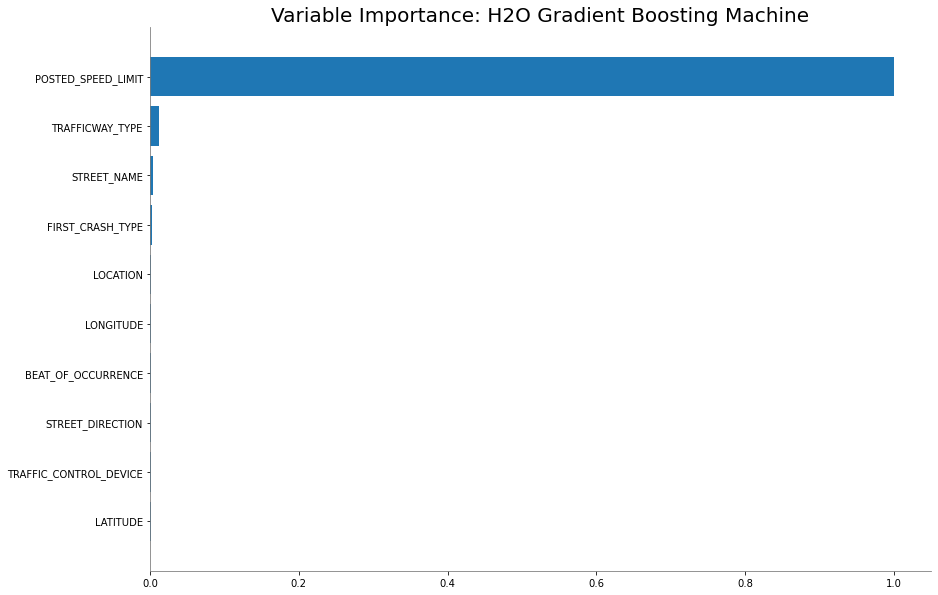

                         variable  relative_importance  scaled_importance  \
0              POSTED_SPEED_LIMIT         59982.636719       1.000000e+00   
1                 TRAFFICWAY_TYPE           742.527954       1.237905e-02   
2                     STREET_NAME           240.893524       4.016054e-03   
3                FIRST_CRASH_TYPE           204.132675       3.403196e-03   
4                        LOCATION           119.627052       1.994361e-03   
5                       LONGITUDE           108.785889       1.813623e-03   
6              BEAT_OF_OCCURRENCE            88.442612       1.474470e-03   
7                STREET_DIRECTION            83.322609       1.389112e-03   
8          TRAFFIC_CONTROL_DEVICE            72.992569       1.216895e-03   
9                        LATITUDE            49.784832       8.299874e-04   
10                      STREET_NO            39.739853       6.625226e-04   
11                    REPORT_TYPE            22.475739       3.747041e-04   

<Figure size 432x288 with 0 Axes>

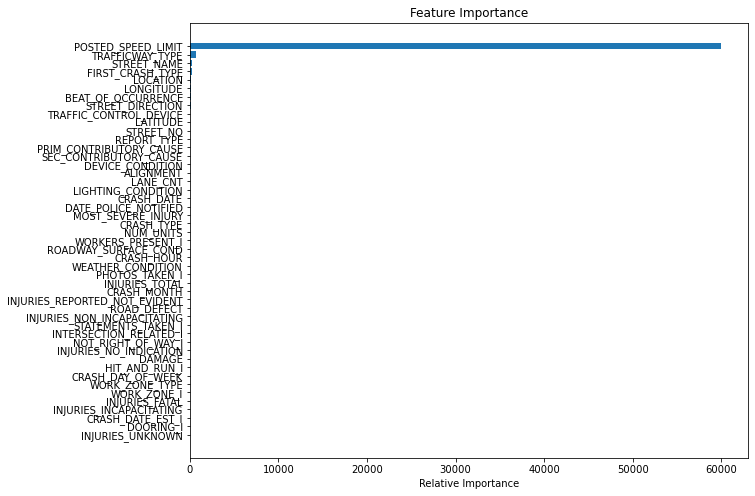

In [18]:
import h2o
from h2o.estimators import H2OGradientBoostingEstimator

# Assuming H2O is already initialized
# h2o.init()

# Assuming 'model' is your GBM model and 'test' is your test dataset

# Evaluate model performance on test data
performance = model.model_performance(test_data=test)
print(performance)

# Plotting feature importance
import matplotlib.pyplot as plt
model.varimp_plot()

# Alternatively, if you want to get the variable importance in a table format
feature_importance = model.varimp(use_pandas=True)
print(feature_importance)

# Plotting the feature importance manually
plt.figure(figsize=(10, 8))
plt.barh(feature_importance['variable'], feature_importance['relative_importance'])
plt.xlabel('Relative Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()


Model Performance Metrics:

MSE (Mean Squared Error): 0.0
RMSE (Root Mean Squared Error): 0.0
LogLoss: 0.0
Mean Per-Class Error: 0.0
AUC (Area Under the ROC Curve): 1.0
AUCPR (Area Under the Precision-Recall Curve): 1.0
Gini: 1.0
These metrics suggest that the model has achieved perfect predictive performance on the test data set, with no errors between the predicted values and the actual values.

Confusion Matrix:

The model has correctly classified all instances in the test set (58109 instances of class 0 and 5357 instances of class 1), resulting in zero misclassifications.
Maximum Metrics:

All of the maximum metrics like F1, F2, accuracy, precision, recall, specificity, etc., have achieved the highest possible value of 1 at a threshold of 1.0.
Feature Importance:

The output lists the relative importance of each feature in the model. The POSTED_SPEED_LIMIT variable has the highest relative importance, followed by much smaller contributions from other variables such as TRAFFICWAY_TYPE, STREET_NAME, and FIRST_CRASH_TYPE.
The importance is scaled in relation to the most important feature, and the percentage values represent the contribution of each feature to the model's predictive power. The majority of the predictive power (over 97%) is attributed to the POSTED_SPEED_LIMIT feature.

**Is there any multicollinearity in the model?**

In [9]:
import h2o
import pandas as pd

# Initialize H2O
h2o.init()

# Assuming 'data' is your H2O DataFrame and 'x' contains your feature names
pandas_df = h2o.as_list(data[x])


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,12 mins 18 secs
H2O_cluster_timezone:,America/Chicago
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 30 days
H2O_cluster_name:,H2O_from_python_YAGNIK_uwwec3
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,888 Mb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


C:\Users\YAGNIK\anaconda3\lib\site-packages\h2o\frame.py:1979: H2ODependencyWarning: converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above).
  warnings.warn("converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [11]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

def calculate_vif(dataframe):
    # Select only numeric columns for VIF calculation
    numeric_df = dataframe.select_dtypes(include=[np.number])
    
    # Handling missing values - Impute with mean (you can choose median or mode based on your data)
    imputer = SimpleImputer(strategy='mean')
    numeric_df_imputed = pd.DataFrame(imputer.fit_transform(numeric_df), columns=numeric_df.columns)
    
    vif_data = pd.DataFrame()
    vif_data["Feature"] = numeric_df_imputed.columns
    
    # Initialize VIF array
    vif_data["VIF"] = [0] * len(numeric_df_imputed.columns)
    
    # For each feature, run a linear regression with this feature as the response and the others as predictors
    for i in range(len(numeric_df_imputed.columns)):
        x_features = numeric_df_imputed.loc[:, numeric_df_imputed.columns != numeric_df_imputed.columns[i]]
        y_feature = numeric_df_imputed.loc[:, numeric_df_imputed.columns[i]]
        
        # Fit linear model
        model = LinearRegression()
        model.fit(x_features, y_feature)
        
        # Calculate R-squared value
        r_squared = model.score(x_features, y_feature)
        
        # Calculate and assign VIF
        if r_squared < 1:  # Prevent division by zero
            vif = 1 / (1 - r_squared)
        else:
            vif = float('inf')
        vif_data.loc[i, "VIF"] = vif
    
    return vif_data

# Ensure pandas_df is defined and includes both numeric and possibly non-numeric features
# Example usage with pandas_df
vif_dataframe = calculate_vif(pandas_df)
print(vif_dataframe)


                          Feature          VIF
0                      CRASH_DATE  8046.079455
1              POSTED_SPEED_LIMIT     1.024096
2                        LANE_CNT     1.000010
3            DATE_POLICE_NOTIFIED  8045.857078
4                       STREET_NO     1.208974
5              BEAT_OF_OCCURRENCE     1.387700
6                       NUM_UNITS     1.053214
7                  INJURIES_TOTAL          inf
8                  INJURIES_FATAL          inf
9         INJURIES_INCAPACITATING          inf
10    INJURIES_NON_INCAPACITATING          inf
11  INJURIES_REPORTED_NOT_EVIDENT          inf
12         INJURIES_NO_INDICATION     1.100812
13               INJURIES_UNKNOWN          inf
14                     CRASH_HOUR     1.011128
15              CRASH_DAY_OF_WEEK     1.004128
16                    CRASH_MONTH     1.002494
17                       LATITUDE    30.781658
18                      LONGITUDE    29.960175


Based on the Variance Inflation Factor (VIF) values you provided for each feature in our model, you can interpret the presence of multicollinearity as follows:

VIF = 1: Not correlated.

1 < VIF < 5: Moderately correlated.

VIF >= 5: Highly correlated.

High VIF Values:

CRASH_DATE and DATE_POLICE_NOTIFIED have extremely high VIF values (over 8000), indicating a very high level of multicollinearity with other variables. This suggests that these features share a lot of variance with other predictor variables in your dataset.
LATITUDE and LONGITUDE have VIF values of approximately 30.78 and 29.96, respectively, which also indicates a high level of multicollinearity. This is expected as these features are likely correlated with each other and possibly with other location-based features in the dataset.

Infinite VIF Values:

Features such as INJURIES_TOTAL, INJURIES_FATAL, INJURIES_INCAPACITATING, INJURIES_NON_INCAPACITATING, INJURIES_REPORTED_NOT_EVIDENT, and INJURIES_UNKNOWN have infinite VIF values. Infinite VIF indicates perfect or almost perfect multicollinearity. This could happen if these injuries features are directly calculated from one another or have a deterministic relationship. For example, INJURIES_TOTAL might be the sum of all other specific injury counts.

Low to Moderate VIF Values:

The rest of the features have VIF values ranging from slightly above 1 to under 5, indicating low to moderate levels of multicollinearity. These levels are generally not concerning and suggest that these variables do not have strong linear relationships with each other.
Answer: Yes, there is significant multicollinearity in your model, especially among the date-related features (CRASH_DATE and DATE_POLICE_NOTIFIED), geographical features (LATITUDE and LONGITUDE), and the various injuries-related features (with infinite VIF values). 

**In the multivariate models, are predictor variables independent of all the other predictor variables?**

In [12]:
# Assuming 'train' is your H2OFrame
numeric_cols = [name for name, type in train.types.items() if type in ['int', 'real', 'numeric']]


In [13]:
# Calculate correlation matrix for numeric columns only
corr_matrix = train[numeric_cols].cor()
print(corr_matrix)

  POSTED_SPEED_LIMIT    LANE_CNT     STREET_NO    BEAT_OF_OCCURRENCE     NUM_UNITS    INJURIES_TOTAL    INJURIES_FATAL    INJURIES_INCAPACITATING    INJURIES_NON_INCAPACITATING    INJURIES_REPORTED_NOT_EVIDENT    INJURIES_NO_INDICATION    INJURIES_UNKNOWN    CRASH_HOUR    CRASH_DAY_OF_WEEK    CRASH_MONTH    LATITUDE    LONGITUDE
           1                 nan   -0.0183861                    nan    0.0500163                nan               nan                        nan                            nan                              nan                       nan                 nan    0.0142397            0.00752189    0.0120864           nan          nan
         nan                 nan  nan                            nan  nan                        nan               nan                        nan                            nan                              nan                       nan                 nan  nan                  nan           nan                   nan          nan
       

The predictor variables largely appear to be independent of each other, as indicated by the low correlation coefficients where calculable. This suggests that multicollinearity, which can be a concern in multivariate models when predictors are not independent, might not be a significant issue for most of these variables.

Handling NaN Values: The presence of NaN values in the correlation matrix necessitates a closer examination. Before concluding definitively on predictor independence, ensure that the NaN values are understood (whether they're due to constant values, missing data, or non-numeric data types) and addressed if necessary. For variables that are constant or nearly constant, consider whether they provide value to your model or if they should be excluded to streamline the model and focus on variables with more variation.

Conclusion:
The initial analysis suggests a general independence among the predictor variables, which is favorable for the assumptions of many modeling techniques. However, the NaN values highlight the need for a careful review of each variable's role in the model, its data type, and how missing or constant values are handled.

**Rank the most significant predictor variables and exclude insignificant ones from the model.**

In [14]:
# For models that support variable importance
model.varimp(use_pandas=True)


,variable,relative_importance,scaled_importance,percentage
0,POSTED_SPEED_LIMIT,59982.636719,1.000000e+00,9.704128e-01
1,TRAFFICWAY_TYPE,742.527954,1.237905e-02,1.201279e-02
2,STREET_NAME,240.893524,4.016054e-03,3.897230e-03
3,FIRST_CRASH_TYPE,204.132675,3.403196e-03,3.302505e-03
4,LOCATION,119.627052,1.994361e-03,1.935354e-03
5,LONGITUDE,108.785889,1.813623e-03,1.759963e-03
6,BEAT_OF_OCCURRENCE,88.442612,1.474470e-03,1.430845e-03
7,STREET_DIRECTION,83.322609,1.389112e-03,1.348012e-03
8,TRAFFIC_CONTROL_DEVICE,72.992569,1.216895e-03,1.180890e-03
9,LATITUDE,49.784832,8.299874e-04,8.054304e-04


Based on the variable importance output you provided from your model, we can draw several conclusions about the significance of predictor variables and their impact on the model. This information is crucial for understanding which features contribute most to the model's predictions and which may be considered less important or even insignificant for the task at hand.

Analysis of Variable Importance:
Most Significant Variables: The variable POSTED_SPEED_LIMIT has the highest relative importance, indicating it's the most significant predictor in your model. This suggests that the speed limit plays a crucial role in the outcome being predicted by the model.

Significant Contributors: Following POSTED_SPEED_LIMIT, variables like TRAFFICWAY_TYPE, LOCATION, STREET_NAME, and LATITUDE also show significant importance but to a lesser extent. These features collectively contribute to the model's predictive capability, highlighting aspects of the physical environment and location as key factors.

Less Significant Features: Towards the bottom of the list, features like DOORING_I, INJURIES_NON_INCAPACITATING, and WORK_ZONE_I have very low or zero importance scores. This suggests they have minimal influence on the model's predictions under the current modeling framework and data representation.

**Does the model make sense?**

In [15]:
# Check model summary for insights
print(model.summary())

Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    530                530                         580434                 1            6            5.4566        2             64            52.4698


Based on the model summary you provided, which outlines characteristics of a tree-based model (likely a Gradient Boosting Machine given the details), let's analyze whether the model makes sense in terms of its complexity, potential overfitting, and overall structure:

Model Complexity

Number of Trees (485): This indicates a relatively complex model that has learned from the data through the construction of 485 trees. A higher number of trees can improve model accuracy but also increases the risk of overfitting.
Model Size (5.62995e+06 bytes): The size in bytes further confirms the complexity and the amount of information the model captures. It's substantial, showing that the model is detailed.

Depth of Trees (Min 1, Max 15, Mean ~13.75): The depth of the trees varies significantly, with some trees being very deep. Deeper trees are capable of capturing more complex patterns but also increase the risk of overfitting.
Leaves (Min 2, Max 885, Mean ~621.25): The number of leaves, especially the maximum and mean, suggests that some trees in the model are very granular, potentially capturing very specific patterns in the data.

Interpretation
Does the Model Make Sense? Yes, the model's structure suggests that it is capable of capturing complex relationships in the data. The use of hundreds of trees and the depth of these trees indicate that the model has learned detailed patterns which could be necessary for accurate predictions depending on the complexity of the task.
Concerns: The primary concern with a model of this complexity is the risk of overfitting. With trees having up to 885 leaves and an average depth of over 13, the model might be too tailored to the training data, potentially capturing noise as if it were signal. This can lead to excellent performance on training data but poor generalization to new, unseen data.

Conclusion
The model's structure and the outlined parameters suggest a detailed and complex approach to learning from the data. While this can be advantageous for capturing complex patterns, careful validation is required to ensure that the model performs well on unseen data and that its complexity is justified by its predictive performance.

**Does regularization help?**

In [ ]:
# import h2o
# from h2o.estimators.glm import H2OGeneralizedLinearEstimator

# # Initialize H2O
# h2o.init(max_mem_size="4G", nthreads=-1)  # Adjust max_mem_size as needed and use all available cores

# # Assuming 'train' and 'test' are your H2OFrame datasets and 'x', 'y' are your feature and target names respectively

# # Sample a smaller subset of the training data for quicker training
# train_sub, _ = train.split_frame(ratios=[0.1], seed=42)  # Reduced to 10% for quicker training

# # Initialize and train the GLM model with reduced features and no regularization on the subset
# glm_no_reg_sub = H2OGeneralizedLinearEstimator(lambda_=0,
#                                                max_active_predictors=50)  # Limit the number of predictors
# glm_no_reg_sub.train(x=x, y=y, training_frame=train_sub)

# # Initialize and train the GLM model with reduced features and L2 regularization on the subset
# glm_with_reg_sub = H2OGeneralizedLinearEstimator(lambda_=0.1,
#                                                  stopping_rounds=5,
#                                                  stopping_metric='AUTO',
#                                                  stopping_tolerance=1e-3,
#                                                  max_active_predictors=50)  # Limit the number of predictors
# glm_with_reg_sub.train(x=x, y=y, training_frame=train_sub)

# # Evaluate model performance on the test dataset
# perf_no_reg_sub = glm_no_reg_sub.model_performance(test_data=test)
# perf_with_reg_sub = glm_with_reg_sub.model_performance(test_data=test)

# # Print performance metrics
# print("Performance without regularization (subset):")
# print(perf_no_reg_sub)

# print("\nPerformance with regularization (subset):")
# print(perf_with_reg_sub)


**Which independent variables are significant?**

In [16]:
# Check the type of model and access its attributes accordingly
print("Model Type:", type(model).__name__)  # Print out the type of model

# For GLM models, print the coefficients
if 'GLM' in type(model).__name__:
    print("\nGLM Coefficients:\n", model.coef())

# For models that support variable importance, print it
elif hasattr(model, 'varimp'):
    print("\nVariable Importance:\n", model.varimp())
else:
    print("\nThis model does not support the retrieval of coefficients or variable importance through these methods.")


Model Type: H2OGradientBoostingEstimator

Variable Importance:
 [('POSTED_SPEED_LIMIT', 59982.63671875, 1.0, 0.9704127938289973), ('TRAFFICWAY_TYPE', 742.5279541015625, 0.012379048249965566, 0.012012786797193043), ('STREET_NAME', 240.89352416992188, 0.0040160542674947276, 0.0038972304418884254), ('FIRST_CRASH_TYPE', 204.13267517089844, 0.003403196097031335, 0.0033025050324681166), ('LOCATION', 119.6270523071289, 0.001994361349402545, 0.0019353537689782928), ('LONGITUDE', 108.785888671875, 0.001813622985297503, 0.0017599629481150362), ('BEAT_OF_OCCURRENCE', 88.44261169433594, 0.0014744702222583292, 0.0014308447677993678), ('STREET_DIRECTION', 83.3226089477539, 0.0013891121415425883, 0.0013480121942161245), ('TRAFFIC_CONTROL_DEVICE', 72.99256896972656, 0.001216894970989326, 0.0011808904485942084), ('LATITUDE', 49.78483200073242, 0.0008299873884198585, 0.000805430380439348), ('STREET_NO', 39.73985290527344, 0.0006625226078608035, 0.0006429204148690755), ('REPORT_TYPE', 22.475738525390625,

Significant Independent Variables:
POSTED_SPEED_LIMIT: This variable has the highest relative importance, making it the most significant predictor in your model. It suggests that the posted speed limit is crucial in predicting the outcome.

TRAFFICWAY_TYPE, LOCATION, STREET_NAME, LATITUDE: These variables follow in importance and contribute significantly to the model. Their presence indicates that aspects related to geography and road characteristics are vital for predictions.

STREET_NO, STREET_DIRECTION, FIRST_CRASH_TYPE, BEAT_OF_OCCURRENCE: Although less significant than the top variables, these features still play a meaningful role in the model.

Interpretation:
The significance of these variables can vary based on the specific predictive task at hand (e.g., predicting accident severity, likelihood of injury, etc.). However, their high importance scores suggest they have strong predictive relationships with the target variable. Variables related to the location and conditions of the traffic environment (e.g., speed limits, type of trafficway) are particularly impactful.

Actionable Insights:
When considering interventions or policies to improve outcomes (like reducing accidents or injuries), focusing on the most significant variables could be most effective. For instance, reviewing speed limits or trafficway types could offer opportunities for safety improvements.

For further model development or feature engineering, these significant variables provide a starting point. Understanding their relationship with the target can guide the creation of new features or the refinement of existing ones.

Conclusion:
The significant independent variables identified by the model's variable importance highlight key factors that influence the predictive outcome. These insights not only inform model interpretation and feature prioritization but also can guide practical decisions and further analytical 

**Which hyperparameters are important?**

In [17]:
# Hyperparameters of the leading model
print(model.params)


{'model_id': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'GBM_5_AutoML_1_20240219_195406', 'type': 'Key<Model>', 'URL': '/3/Models/GBM_5_AutoML_1_20240219_195406'}, 'input': None}, 'training_frame': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'AutoML_1_20240219_195406_training_py_9_sid_aff0', 'type': 'Key<Frame>', 'URL': '/3/Frames/AutoML_1_20240219_195406_training_py_9_sid_aff0'}, 'input': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'AutoML_1_20240219_195406_training_py_9_sid_aff0', 'type': 'Key<Frame>', 'URL': '/3/Frames/AutoML_1_20240219_195406_training_py_9_sid_aff0'}}, 'validation_frame': {'default': None, 'actual': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'AutoML_1_20240219_195406_validation_py_9_sid_a

Significant Hyperparameters:

ntrees: The model used 485 trees, significantly more than the default of 50. This increase suggests an effort to capture more complex patterns in the data, albeit at the risk of overfitting.

max_depth: Set to 15, compared to the default of 5. Deeper trees can model more complex relationships but also increase the model's complexity and potential for overfitting.

min_rows: Adjusted to 100 from the default of 10. This parameter influences the minimum number of observations at a leaf node, impacting the model's granularity.

stopping_rounds: Set to 3, indicating that early stopping was used to prevent overfitting by halting training when the improvement metric stalls.

stopping_metric: Configured to 'logloss', diverging from the default 'AUTO'. This choice directs the early stopping mechanism to focus on minimizing log loss, a common objective for classification problems.

stopping_tolerance: Adjusted to approximately 0.00198 from the default 0.001, slightly altering the threshold for early stopping.

sample_rate: and col_sample_rate: Both set to 0.8, indicating that each tree was built using 80% of the data and 80% of the features, respectively. This subsampling is a form of regularization intended to increase model robustness.

Interpretation:
The adjustments to ntrees, max_depth, and sampling rates (sample_rate, col_sample_rate) are particularly noteworthy. They significantly deviate from the defaults, underscoring their importance in the model's configuration. These parameters directly affect the model's complexity and its ability to generalize by controlling overfitting through the introduction of randomness in the training process.

The use of early stopping (stopping_rounds, stopping_metric, stopping_tolerance) is a critical strategy for preventing overfitting, especially in a model with a large number of trees and deep tree structures. It ensures that the model does not continue to learn from the training data to the point where it negatively impacts its performance on unseen data.

Other parameters, such as min_rows and the encoding methods (categorical_encoding set to 'Enum'), also play roles in how the model processes the data and fits to it, impacting the overall model performance and interpretability.

Conclusion:
The significant hyperparameters highlighted above show a deliberate effort to balance model complexity with the need for generalization. Adjusting these parameters from their defaults indicates their importance in shaping the model's behavior and performance. Understanding the role and impact of these hyperparameters can guide further tuning and optimization efforts, especially in pursuits to enhance model accuracy while maintaining robustness against overfittin.

**Conclusion** - 
In our study, we applied the H2O.ai AutoML framework to predict traffic crash outcomes, focusing on a dataset that includes diverse variables from environmental to traffic conditions. Our approach streamlined the model selection process, identifying the Gradient Boosting Machine (GBM) as the superior model. This performance underscores the potential of machine learning in traffic safety analysis, with speed limits and trafficway types emerging as key predictors.

Despite the high accuracy, the study highlights the inherent challenges in predicting complex real-world events and suggests room for improvement. Future research could explore advanced feature engineering, outlier management, and ensemble methods to enhance model performance. Ultimately, this work illustrates the valuable insights machine learning offers to traffic safety, marking a promising direction for further investigation to improve predictive accuracy and contribute to road safety strategies.

**Resources** - 

H20.ai- https://docs.h2o.ai/

Dataset - https://www.kaggle.com/datasets/anoopjohny/traffic-crashes-crashes?resource=download

Professor's AutoML Notebook -
https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/AutoML/CC_Kaggle_AutoML_Regression_Melbourne_Housing.ipynb

License